# Request
What are in these files? Show Code.

In [1]:
import pandas as pd

# File paths
usa_population_file = 'USA.Population.txt'
can_population_file = 'CAN.Population.txt'
usa_bltper_file = 'USA.bltper_1x1.txt'
can_bltper_file = 'CAN.bltper_1x1.txt'
usa_deaths_file = 'USA.Deaths_1x1.txt'
can_deaths_file = 'CAN.Deaths_1x1.txt'
usa_mx_file = 'USA.Mx_1x1.txt'
can_mx_file = 'CAN.Mx_1x1.txt'

# Read and display USA Population data
usa_population = pd.read_csv(usa_population_file, sep='\t')
print("USA Population Data:")
print(usa_population.head())

# Read and display CAN Population data
can_population = pd.read_csv(can_population_file, sep='\t')
print("\nCAN Population Data:")
print(can_population.head())

# Read and display USA bltper data
usa_bltper = pd.read_csv(usa_bltper_file, sep='\t')
print("\nUSA Life Table Data:")
print(usa_bltper.head())

# Read and display CAN bltper data
can_bltper = pd.read_csv(can_bltper_file, sep='\t')
print("\nCAN Life Table Data:")
print(can_bltper.head())

# Read and display USA Deaths data
usa_deaths = pd.read_csv(usa_deaths_file, sep='\t')
print("\nUSA Deaths Data:")
print(usa_deaths.head())

# Read and display CAN Deaths data
can_deaths = pd.read_csv(can_deaths_file, sep='\t')
print("\nCAN Deaths Data:")
print(can_deaths.head())

# Read and display USA Mx data
usa_mx = pd.read_csv(usa_mx_file, sep='\t')
print("\nUSA Mortality Rates Data:")
print(usa_mx.head())

# Read and display CAN Mx data
can_mx = pd.read_csv(can_mx_file, sep='\t')
print("\nCAN Mortality Rates Data:")
print(can_mx.head())

USA Population Data:
  The United States of America, Population size (abridged)  \
0    Year          Age             Female        ...         
1       1933        0            984472.26      1...         
2       1933        1           1040496.02      1...         
3       1933        2           1093043.81      1...         
4       1933        3           1107994.31      1...         

   Last modified: 15 Mar 2023;  Methods Protocol: v6 (2017)  
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

CAN Population Data:
                  Canada, Population size (abridged)  \
0    Year          Age             Female        ...   
1       1921        0            108499.52       ...   
2       1921        1            107539.94  

# Request
What are the population trends over the years for both the USA and Canada? Show Code.

In [2]:
# Read the datasets as raw text
with open('USA.Population.txt', 'r') as file:
    usa_population_lines = file.readlines()

with open('CAN.Population.txt', 'r') as file:
    can_population_lines = file.readlines()

# Extract and clean the data starting from the third line
usa_population_cleaned = [line.split() for line in usa_population_lines[3:] if line.strip() and line.split()[0].isdigit()]
can_population_cleaned = [line.split() for line in can_population_lines[3:] if line.strip() and line.split()[0].isdigit()]

# Function to clean age values and convert to numeric
def clean_age(age):
    if age.isdigit():
        return int(age)
    else:
        return None

# Apply the cleaning function to the 'Age' column
for entry in usa_population_cleaned:
    entry[1] = clean_age(entry[1])

for entry in can_population_cleaned:
    entry[1] = clean_age(entry[1])

# Create DataFrames from the cleaned data
usa_population_df = pd.DataFrame(usa_population_cleaned, columns=['Year', 'Age', 'Female', 'Male', 'Total']).dropna(subset=['Age'])
can_population_df = pd.DataFrame(can_population_cleaned, columns=['Year', 'Age', 'Female', 'Male', 'Total']).dropna(subset=['Age'])

# Convert columns to appropriate data types
usa_population_df = usa_population_df.astype({'Year': 'int', 'Age': 'int', 'Female': 'float', 'Male': 'float', 'Total': 'float'})
can_population_df = can_population_df.astype({'Year': 'int', 'Age': 'int', 'Female': 'float', 'Male': 'float', 'Total': 'float'})

# Display the first few rows to verify the data structure
print(usa_population_df.head())
print(can_population_df.head())

   Year  Age      Female        Male       Total
0  1933    0   984472.26  1015361.55  1999833.81
1  1933    1  1040496.02  1064088.29  2104584.31
2  1933    2  1093043.81  1117527.14  2210570.95
3  1933    3  1107994.31  1135046.59  2243040.90
4  1933    4  1130624.43  1179513.62  2310138.05
   Year  Age     Female       Male      Total
0  1921    0  108499.52  111940.54  220440.06
1  1921    1  107539.94  109577.74  217117.68
2  1921    2  108310.82  110221.12  218531.94
3  1921    3  108455.40  110284.39  218739.79
4  1921    4  107845.81  109651.46  217497.27


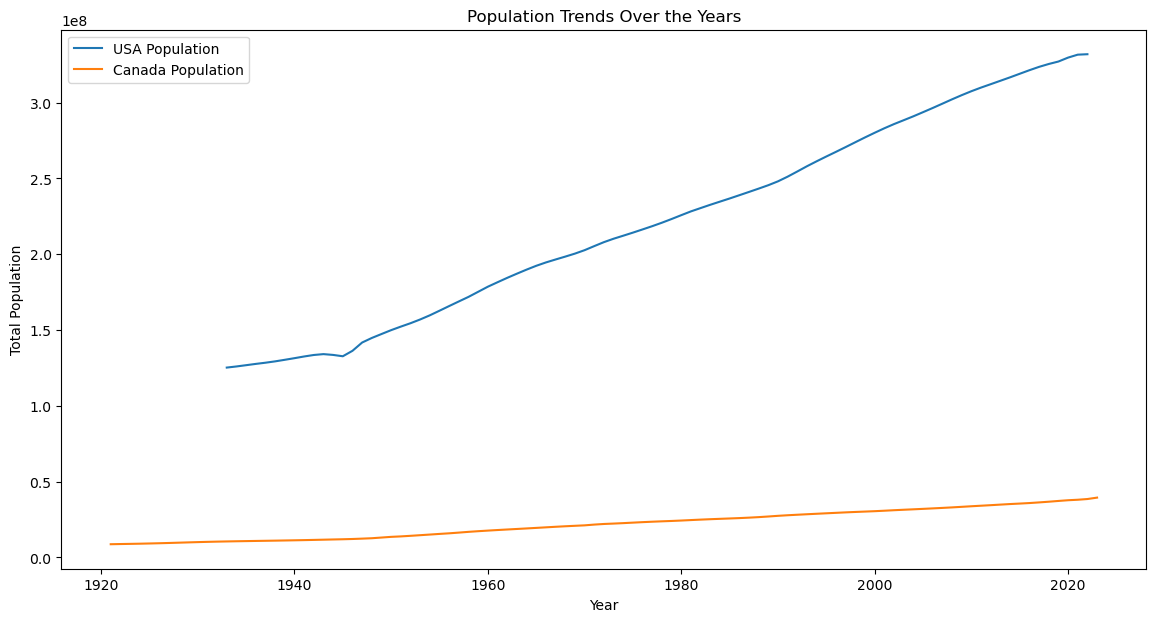

In [3]:
import matplotlib.pyplot as plt

# Group and sum the total population by year for both USA and Canada
usa_population_trend = usa_population_df.groupby('Year')['Total'].sum()
can_population_trend = can_population_df.groupby('Year')['Total'].sum()

# Plot the population trends
plt.figure(figsize=(14, 7))
plt.plot(usa_population_trend, label='USA Population')
plt.plot(can_population_trend, label='Canada Population')
plt.title('Population Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.show()

# Request
How do birth rates compare between the USA and Canada over the years? Show Code.

In [4]:
# Read the first few lines of the files to inspect their structure
usa_bltper_lines = []
with open('USA.bltper_1x1.txt', 'r') as file:
    for _ in range(10):
        usa_bltper_lines.append(file.readline())

can_bltper_lines = []
with open('CAN.bltper_1x1.txt', 'r') as file:
    for _ in range(10):
        can_bltper_lines.append(file.readline())

usa_bltper_lines, can_bltper_lines


(['The United States of America, Life tables (period 1x1), Total\tLast modified: 15 Mar 2023;  Methods Protocol: v6 (2017)\n',
  '\n',
  '  Year          Age         mx       qx    ax      lx      dx      Lx       Tx     ex\n',
  '  1933           0      0.06129  0.05861  0.25  100000    5861   95624  6089609  60.90\n',
  '  1933           1      0.00946  0.00941  0.50   94139     886   93696  5993985  63.67\n',
  '  1933           2      0.00435  0.00434  0.50   93253     405   93050  5900289  63.27\n',
  '  1933           3      0.00310  0.00310  0.50   92848     288   92704  5807239  62.55\n',
  '  1933           4      0.00239  0.00238  0.50   92560     221   92450  5714535  61.74\n',
  '  1933           5      0.00197  0.00197  0.50   92340     182   92248  5622085  60.88\n',
  '  1933           6      0.00177  0.00177  0.50   92157     163   92076  5529837  60.00\n'],
 ['Canada, Life tables (period 1x1), Total\tLast modified: 15 Jul 2024;  Methods Protocol: v6 (2017)\n',
  '\n',


   Year Age       mx       qx    ax      lx    dx     Lx       Tx     ex
0  1933   0  0.06129  0.05861  0.25  100000  5861  95624  6089609  60.90
1  1933   1  0.00946  0.00941  0.50   94139   886  93696  5993985  63.67
2  1933   2  0.00435  0.00434  0.50   93253   405  93050  5900289  63.27
3  1933   3  0.00310  0.00310  0.50   92848   288  92704  5807239  62.55
4  1933   4  0.00239  0.00238  0.50   92560   221  92450  5714535  61.74
   Year Age       mx       qx    ax      lx     dx     Lx       Tx     ex
0  1921   0  0.12226  0.11269  0.31  100000  11269  92174  5709930  57.10
1  1921   1  0.01671  0.01657  0.50   88731   1470  87996  5617756  63.31
2  1921   2  0.00797  0.00794  0.50   87260    693  86914  5529760  63.37
3  1921   3  0.00578  0.00576  0.50   86568    499  86318  5442846  62.87
4  1921   4  0.00465  0.00464  0.50   86069    400  85869  5356527  62.24


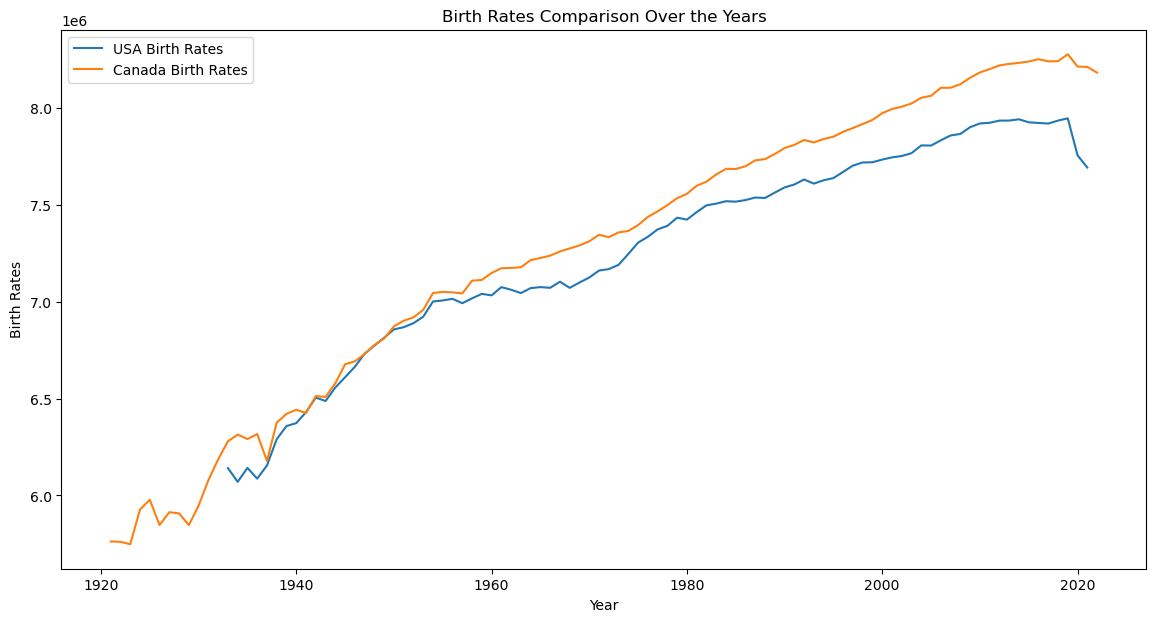

In [5]:
# Read the datasets with proper headers, skipping the first two lines
usa_bltper = pd.read_csv('USA.bltper_1x1.txt', sep='\s+', skiprows=2)
can_bltper = pd.read_csv('CAN.bltper_1x1.txt', sep='\s+', skiprows=2)

# Rename columns for easier access if necessary
usa_bltper.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']
can_bltper.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']

# Display the first few rows to verify the data structure
print(usa_bltper.head())
print(can_bltper.head())

# Aggregate the birth rates by year for both countries
usa_birth_rates = usa_bltper.groupby('Year')['lx'].sum()
can_birth_rates = can_bltper.groupby('Year')['lx'].sum()

# Plot the birth rates comparison
plt.figure(figsize=(14, 7))
plt.plot(usa_birth_rates, label='USA Birth Rates')
plt.plot(can_birth_rates, label='Canada Birth Rates')
plt.title('Birth Rates Comparison Over the Years')
plt.xlabel('Year')
plt.ylabel('Birth Rates')
plt.legend()
plt.show()

# Request
What are the trends in death rates for different age groups in the USA and Canada? Show Code.

In [6]:
# Read the first few lines of the files to inspect their structure
usa_deaths_lines = []
with open('USA.Deaths_1x1.txt', 'r') as file:
    for _ in range(10):
        usa_deaths_lines.append(file.readline())

can_deaths_lines = []
with open('CAN.Deaths_1x1.txt', 'r') as file:
    for _ in range(10):
        can_deaths_lines.append(file.readline())

usa_deaths_lines, can_deaths_lines

(['The United States of America, Deaths (period 1x1), \tLast modified: 15 Mar 2023;  Methods Protocol: v6 (2017)\n',
  '\n',
  '  Year          Age             Female            Male           Total\n',
  '  1933           0             52615.77        68438.11       121053.88\n',
  '  1933           1              8917.13        10329.16        19246.29\n',
  '  1933           2              4336.92         5140.05         9476.97\n',
  '  1933           3              3161.59         3759.88         6921.47\n',
  '  1933           4              2493.84         2932.59         5426.43\n',
  '  1933           5              2139.87         2537.53         4677.40\n',
  '  1933           6              1939.70         2337.76         4277.46\n'],
 ['Canada, Deaths (period 1x1), \tLast modified: 15 Jul 2024;  Methods Protocol: v6 (2017)\n',
  '\n',
  '  Year          Age             Female            Male           Total\n',
  '  1921           0             11226.47        15076.73    

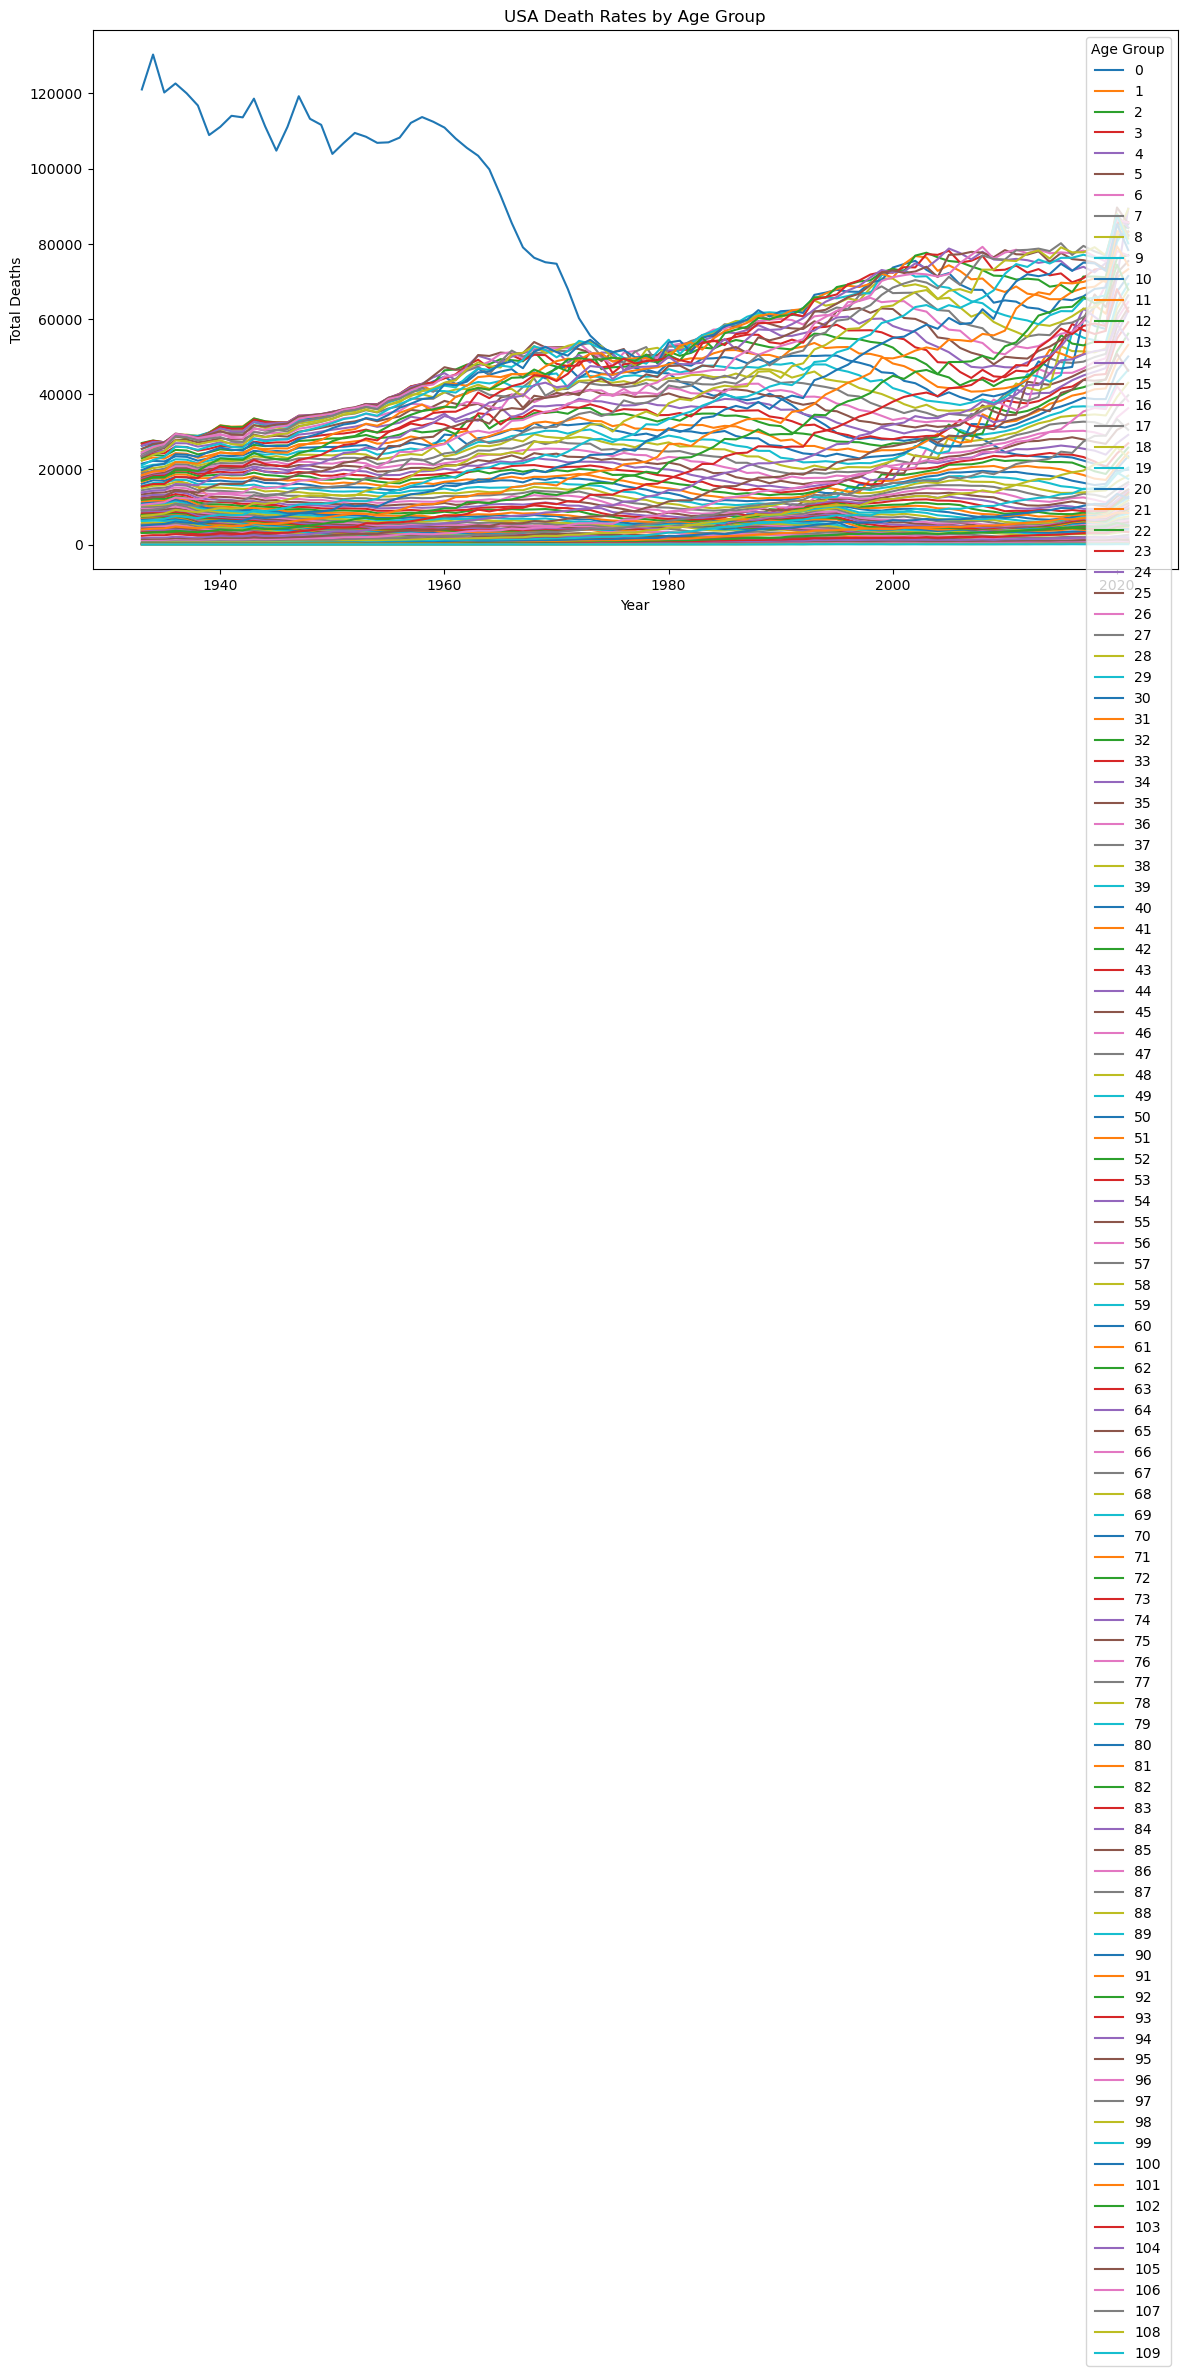

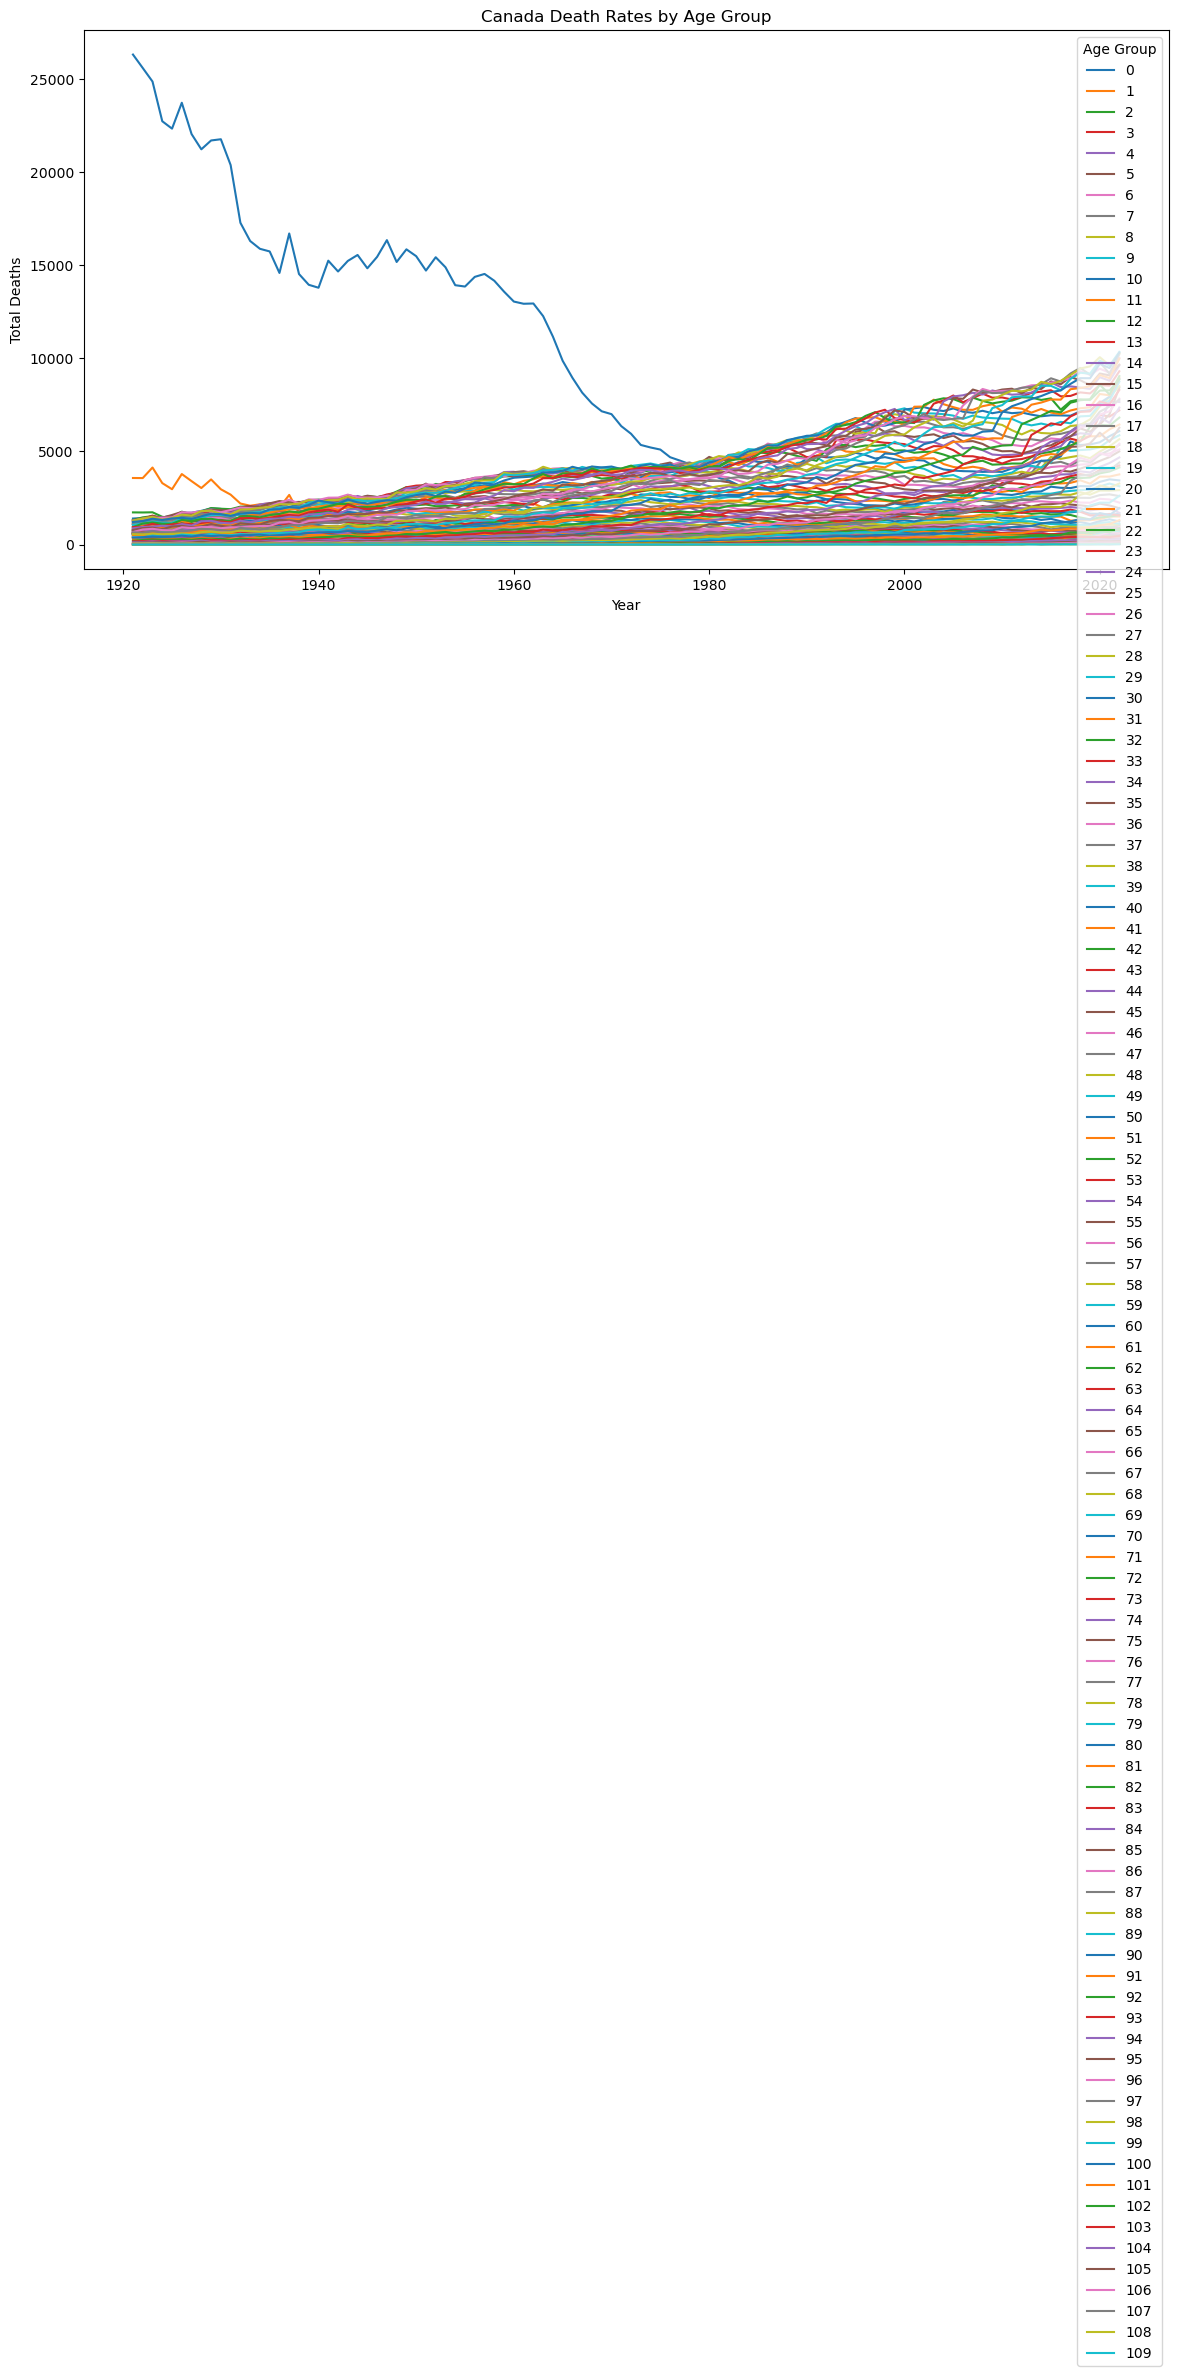

In [7]:
# Read the datasets with proper headers, skipping the first two lines
usa_deaths = pd.read_csv('USA.Deaths_1x1.txt', sep='\s+', skiprows=2)
can_deaths = pd.read_csv('CAN.Deaths_1x1.txt', sep='\s+', skiprows=2)

# Rename columns for easier access if necessary
usa_deaths.columns = ['Year', 'Age', 'Female', 'Male', 'Total']
can_deaths.columns = ['Year', 'Age', 'Female', 'Male', 'Total']

# Filter out rows where age is not a digit (e.g., "110+")
usa_deaths = usa_deaths[usa_deaths['Age'].apply(lambda x: str(x).isdigit())]
can_deaths = can_deaths[can_deaths['Age'].apply(lambda x: str(x).isdigit())]

# Convert Age column to integer
usa_deaths['Age'] = usa_deaths['Age'].astype(int)
can_deaths['Age'] = can_deaths['Age'].astype(int)

# Aggregate death rates by year and age group for both countries
usa_deaths_trend = usa_deaths.groupby(['Year', 'Age'])['Total'].sum().unstack()
can_deaths_trend = can_deaths.groupby(['Year', 'Age'])['Total'].sum().unstack()

# Plot the death rate trends for different age groups
plt.figure(figsize=(14, 7))
usa_deaths_trend.plot(ax=plt.gca(), title='USA Death Rates by Age Group')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Age Group')
plt.show()

plt.figure(figsize=(14, 7))
can_deaths_trend.plot(ax=plt.gca(), title='Canada Death Rates by Age Group')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Age Group')
plt.show()

Please edit the age range to make the graph look cleaner.

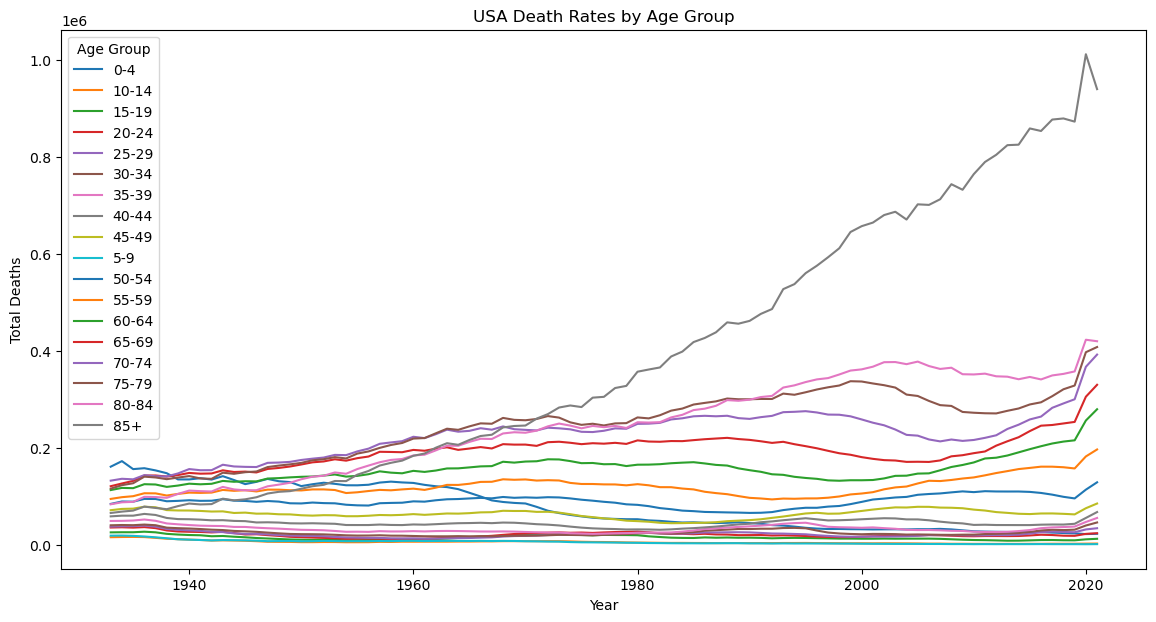

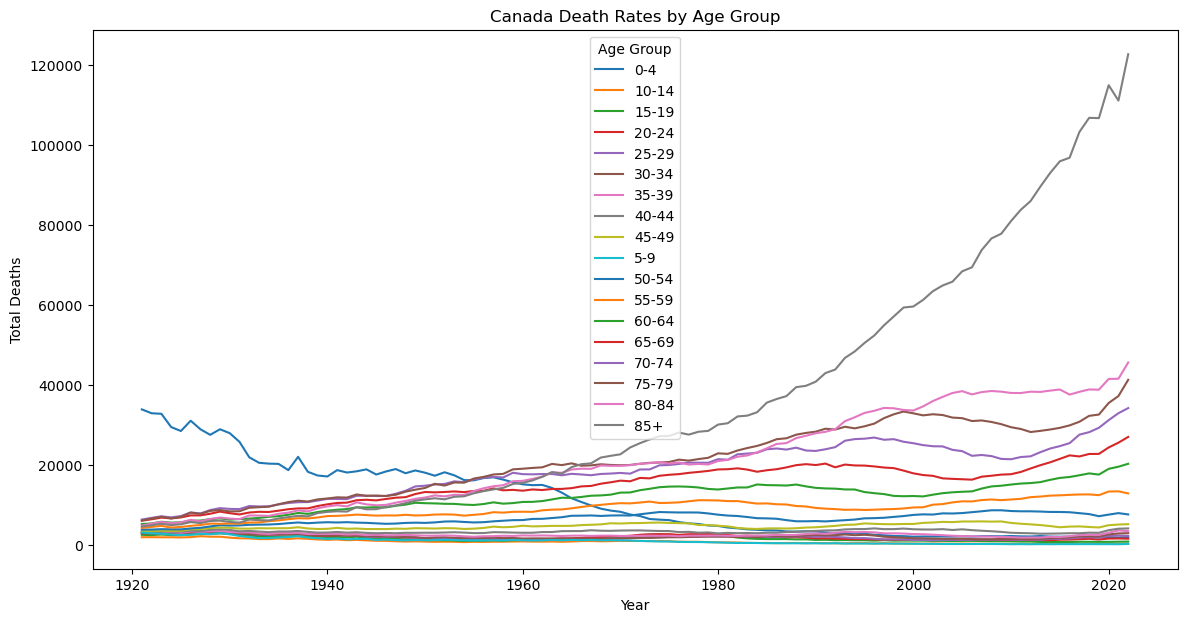

In [8]:
# Define age groups
def categorize_age(age):
    if age < 5:
        return '0-4'
    elif age < 10:
        return '5-9'
    elif age < 15:
        return '10-14'
    elif age < 20:
        return '15-19'
    elif age < 25:
        return '20-24'
    elif age < 30:
        return '25-29'
    elif age < 35:
        return '30-34'
    elif age < 40:
        return '35-39'
    elif age < 45:
        return '40-44'
    elif age < 50:
        return '45-49'
    elif age < 55:
        return '50-54'
    elif age < 60:
        return '55-59'
    elif age < 65:
        return '60-64'
    elif age < 70:
        return '65-69'
    elif age < 75:
        return '70-74'
    elif age < 80:
        return '75-79'
    elif age < 85:
        return '80-84'
    else:
        return '85+'

# Apply the age categorization
usa_deaths['AgeGroup'] = usa_deaths['Age'].apply(categorize_age)
can_deaths['AgeGroup'] = can_deaths['Age'].apply(categorize_age)

# Aggregate death rates by year and age group for both countries
usa_deaths_grouped = usa_deaths.groupby(['Year', 'AgeGroup'])['Total'].sum().unstack()
can_deaths_grouped = can_deaths.groupby(['Year', 'AgeGroup'])['Total'].sum().unstack()

# Plot the death rate trends for different age groups
plt.figure(figsize=(14, 7))
usa_deaths_grouped.plot(ax=plt.gca(), title='USA Death Rates by Age Group')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Age Group')
plt.show()

plt.figure(figsize=(14, 7))
can_deaths_grouped.plot(ax=plt.gca(), title='Canada Death Rates by Age Group')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Age Group')
plt.show()

# Request
How has life expectancy changed over time in the USA and Canada? Show Code.

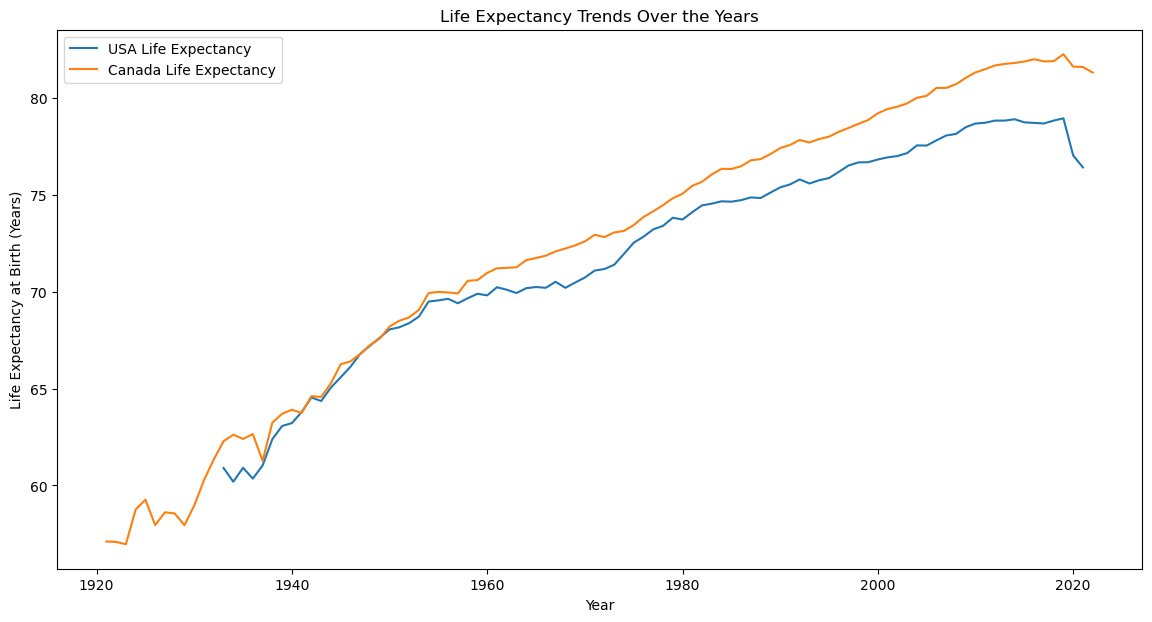

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the life table data
usa_life_table = pd.read_csv('USA.bltper_1x1.txt', sep='\s+', skiprows=2)
can_life_table = pd.read_csv('CAN.bltper_1x1.txt', sep='\s+', skiprows=2)

# Rename columns for easier access if necessary
usa_life_table.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']
can_life_table.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']

# Filter data to include only life expectancy at birth (Age '0' as string)
usa_life_expectancy = usa_life_table[usa_life_table['Age'] == '0'][['Year', 'ex']]
can_life_expectancy = can_life_table[can_life_table['Age'] == '0'][['Year', 'ex']]

# Plot the life expectancy trends over the years
plt.figure(figsize=(14, 7))
plt.plot(usa_life_expectancy['Year'], usa_life_expectancy['ex'], label='USA Life Expectancy')
plt.plot(can_life_expectancy['Year'], can_life_expectancy['ex'], label='Canada Life Expectancy')
plt.title('Life Expectancy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.legend()
plt.show()

# Request
What is the comparison of mortality rates between males and females in the USA and Canada?

In [10]:
# Ensure the columns contain numeric data
usa_mortality['Male'] = pd.to_numeric(usa_mortality['Male'], errors='coerce')
usa_mortality['Female'] = pd.to_numeric(usa_mortality['Female'], errors='coerce')
can_mortality['Male'] = pd.to_numeric(can_mortality['Male'], errors='coerce')
can_mortality['Female'] = pd.to_numeric(can_mortality['Female'], errors='coerce')

# Aggregate mortality rates by year for both genders
usa_mortality_males_agg = usa_mortality.groupby('Year')['Male'].mean()
usa_mortality_females_agg = usa_mortality.groupby('Year')['Female'].mean()
can_mortality_males_agg = can_mortality.groupby('Year')['Male'].mean()
can_mortality_females_agg = can_mortality.groupby('Year')['Female'].mean()

# Plot the mortality rate trends for males and females
plt.figure(figsize=(14, 7))
plt.plot(usa_mortality_males_agg, label='USA Male Mortality Rates')
plt.plot(usa_mortality_females_agg, label='USA Female Mortality Rates')
plt.plot(can_mortality_males_agg, label='Canada Male Mortality Rates')
plt.plot(can_mortality_females_agg, label='Canada Female Mortality Rates')
plt.title('Mortality Rates Comparison Between Males and Females')
plt.xlabel('Year')
plt.ylabel('Mortality Rates')
plt.legend()
plt.show()

NameError: name 'usa_mortality' is not defined

Can you show infant mortality trends?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the life table data
usa_life_table = pd.read_csv('USA.bltper_1x1.txt', sep='\s+', skiprows=2)
can_life_table = pd.read_csv('CAN.bltper_1x1.txt', sep='\s+', skiprows=2)

# Rename columns for easier access if necessary
usa_life_table.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']
can_life_table.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']

# Filter data to include only infant mortality rates (Age '0' as string)
usa_infant_mortality = usa_life_table[usa_life_table['Age'] == '0'][['Year', 'mx']]
can_infant_mortality = can_life_table[can_life_table['Age'] == '0'][['Year', 'mx']]

# Plot the infant mortality trends over the years
plt.figure(figsize=(14, 7))
plt.plot(usa_infant_mortality['Year'], usa_infant_mortality['mx'], label='USA Infant Mortality Rates')
plt.plot(can_infant_mortality['Year'], can_infant_mortality['mx'], label='Canada Infant Mortality Rates')
plt.title('Infant Mortality Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rates')
plt.legend()
plt.show()

Can you compare mortality rates by age? Shorten the age range to make the graph look clean.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the life table data
usa_life_table = pd.read_csv('USA.bltper_1x1.txt', sep='\s+', skiprows=2)
can_life_table = pd.read_csv('CAN.bltper_1x1.txt', sep='\s+', skiprows=2)

# Rename columns for easier access if necessary
usa_life_table.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']
can_life_table.columns = ['Year', 'Age', 'mx', 'qx', 'ax', 'lx', 'dx', 'Lx', 'Tx', 'ex']

# Define broader age groups
age_groups = {
    '0-19': list(range(0, 20)),
    '20-39': list(range(20, 40)),
    '40-59': list(range(40, 60)),
    '60-79': list(range(60, 80)),
    '80+': list(range(80, 101))
}

# Function to aggregate mortality rates by age group
def aggregate_mortality_by_age_group(data, age_groups):
    result = {}
    for group, ages in age_groups.items():
        filtered_data = data[data['Age'].astype(str).isin(map(str, ages))]
        aggregated_data = filtered_data.groupby('Year')['mx'].mean()
        result[group] = aggregated_data
    return result

# Aggregate mortality rates by age group for both countries
usa_mortality_by_age_group = aggregate_mortality_by_age_group(usa_life_table, age_groups)
can_mortality_by_age_group = aggregate_mortality_by_age_group(can_life_table, age_groups)

# Plot the mortality rates by age group
plt.figure(figsize=(14, 7))
for group in age_groups.keys():
    plt.plot(usa_mortality_by_age_group[group], label=f'USA {group} Mortality Rates')
    plt.plot(can_mortality_by_age_group[group], label=f'Canada {group} Mortality Rates', linestyle='dashed')

plt.title('Mortality Rates Comparison by Age Group')
plt.xlabel('Year')
plt.ylabel('Mortality Rates')
plt.legend()
plt.show()